In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.svm import LinearSVC as L_SVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [2]:
df = pd.read_csv('derm.csv')
sh1, sh2 = df.shape
print(sh1, sh2)
features = [i for i in df.columns if i not in ['class']]
df.head()

366 35


,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [5]:
df.info()
df.describe(include = 'all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   erythema                             366 non-null    int64 
 1   scaling                              366 non-null    int64 
 2   definite_borders                     366 non-null    int64 
 3   itching                              366 non-null    int64 
 4   koebner_phenomenon                   366 non-null    int64 
 5   polygonal_papules                    366 non-null    int64 
 6   follicular_papules                   366 non-null    int64 
 7   oral_mucosal_involvement             366 non-null    int64 
 8   knee_and_elbow_involvement           366 non-null    int64 
 9   scalp_involvement                    366 non-null    int64 
 10  family_history                       366 non-null    int64 
 11  melanin_incontinence                 366 non-

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366,366.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,NaN
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,NaN,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,NaN,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,NaN,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,NaN,4.000000


In [3]:
df.drop_duplicates(inplace=True)
print(sh1, sh2, df.shape)
print(sh1 - df.shape[0])
df.isnull().sum().sort_values()

366 35 (366, 35)
0


erythema                               0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_microabcess                      0
focal_hypergranulosis                  0
parakeratosis                          0
disappearance_granular_layer           0
spongiosis                             0
saw_tooth_appearance_retes             0
follicular_horn_plug                   0
perifollicular_parakeratosis           0
inflammatory_mononuclear_infiltrate    0
band_like_infiltrate                   0
vacuolisation_damage_basal_layer       0
age                                    0
hyperkeratosis                         0
exocytosis                             0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papul

In [4]:
df.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_infiltrate', 'PNL_infiltrate', 'fibrosis_papillary_dermis',
       'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis',
       'clubbing_rete_ridges', 'elongation_rete_ridges',
       'thinning_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_granular_layer', 'vacuolisation_damage_basal_layer',
       'spongiosis', 'saw_tooth_appearance_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_mononuclear_infiltrate',
       'band_like_infiltrate', 'age', 'class'],
      dtype='object')

In [5]:
df.nunique()

erythema                                4
scaling                                 4
definite_borders                        4
itching                                 4
koebner_phenomenon                      4
polygonal_papules                       4
follicular_papules                      4
oral_mucosal_involvement                4
knee_and_elbow_involvement              4
scalp_involvement                       4
family_history                          2
melanin_incontinence                    4
eosinophils_infiltrate                  3
PNL_infiltrate                          4
fibrosis_papillary_dermis               4
exocytosis                              4
acanthosis                              4
hyperkeratosis                          4
parakeratosis                           4
clubbing_rete_ridges                    4
elongation_rete_ridges                  4
thinning_suprapapillary_epidermis       4
spongiform_pustule                      4
munro_microabcess                 

In [9]:
df[df['age'].str.isnumeric() == False]

df['age'] = df['age'].replace('?', np.nan)

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df[['age']])
df['age'] = imputer.transform(df[['age']]).ravel().astype('int64')

In [23]:
for i in range(1, 7):
    x = df[df["class"] == i]
    print(x.count())

erythema                               112
scaling                                112
definite_borders                       112
itching                                112
koebner_phenomenon                     112
polygonal_papules                      112
follicular_papules                     112
oral_mucosal_involvement               112
knee_and_elbow_involvement             112
scalp_involvement                      112
family_history                         112
melanin_incontinence                   112
eosinophils_infiltrate                 112
PNL_infiltrate                         112
fibrosis_papillary_dermis              112
exocytosis                             112
acanthosis                             112
hyperkeratosis                         112
parakeratosis                          112
clubbing_rete_ridges                   112
elongation_rete_ridges                 112
thinning_suprapapillary_epidermis      112
spongiform_pustule                     112
munro_micro

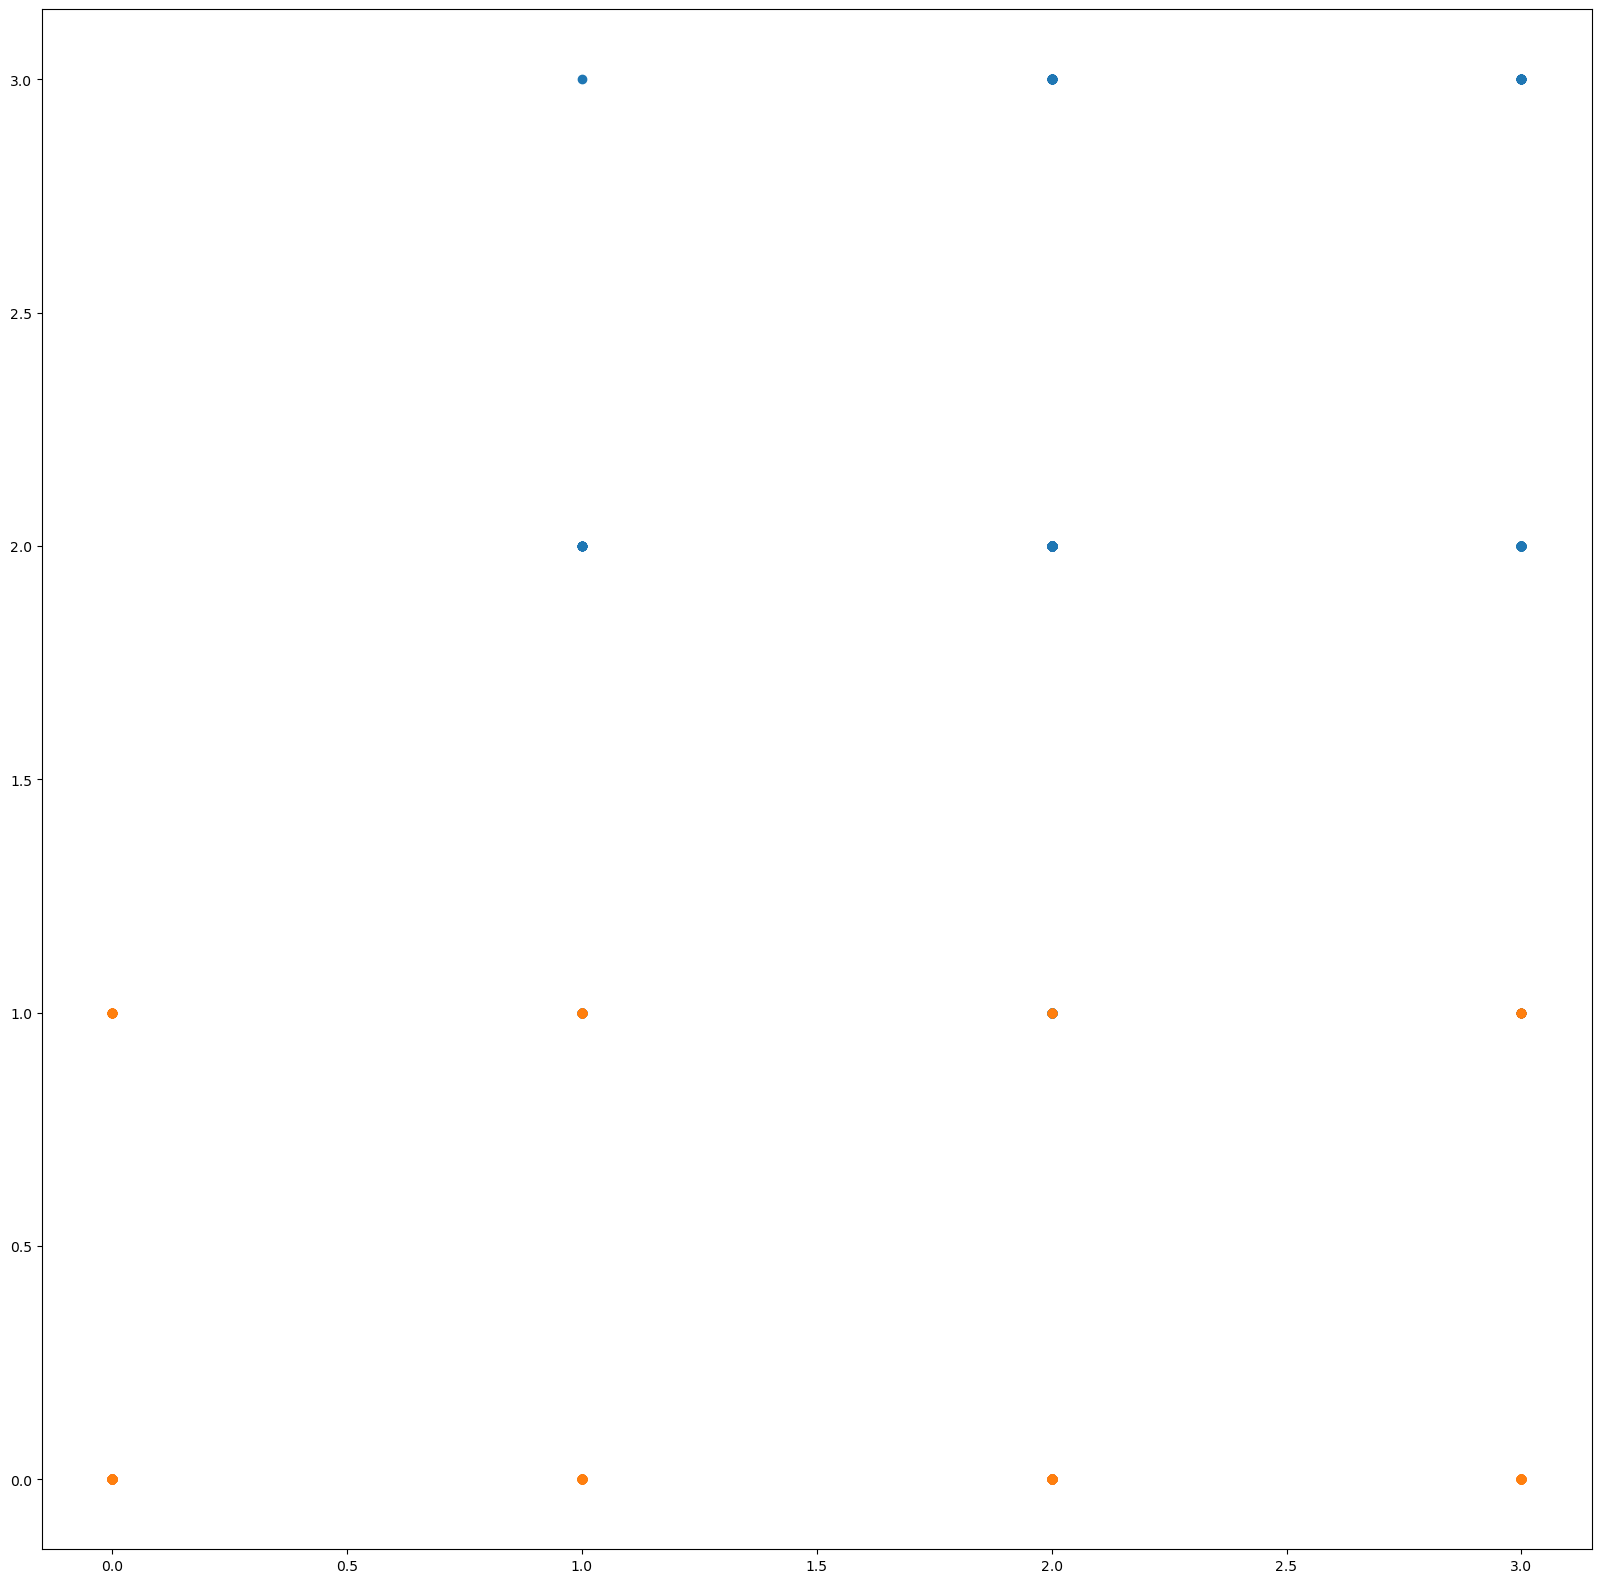

In [7]:
fig, axes = plt.subplots(figsize=(20, 20))

axes.scatter(x=df['erythema'], y=df['scaling'])
axes.scatter(x=df['itching'], y=df['family_history'])

plt.show()

['erythema', 'scaling', 'definite_borders', 'itching', 'koebner_phenomenon', 'polygonal_papules']
['scaling', 'definite_borders', 'itching', 'koebner_phenomenon', 'polygonal_papules', 'follicular_papules']
['definite_borders', 'itching', 'koebner_phenomenon', 'polygonal_papules', 'follicular_papules', 'oral_mucosal_involvement']
['itching', 'koebner_phenomenon', 'polygonal_papules', 'follicular_papules', 'oral_mucosal_involvement', 'knee_and_elbow_involvement']
['koebner_phenomenon', 'polygonal_papules', 'follicular_papules', 'oral_mucosal_involvement', 'knee_and_elbow_involvement', 'scalp_involvement']
['polygonal_papules', 'follicular_papules', 'oral_mucosal_involvement', 'knee_and_elbow_involvement', 'scalp_involvement', 'family_history']


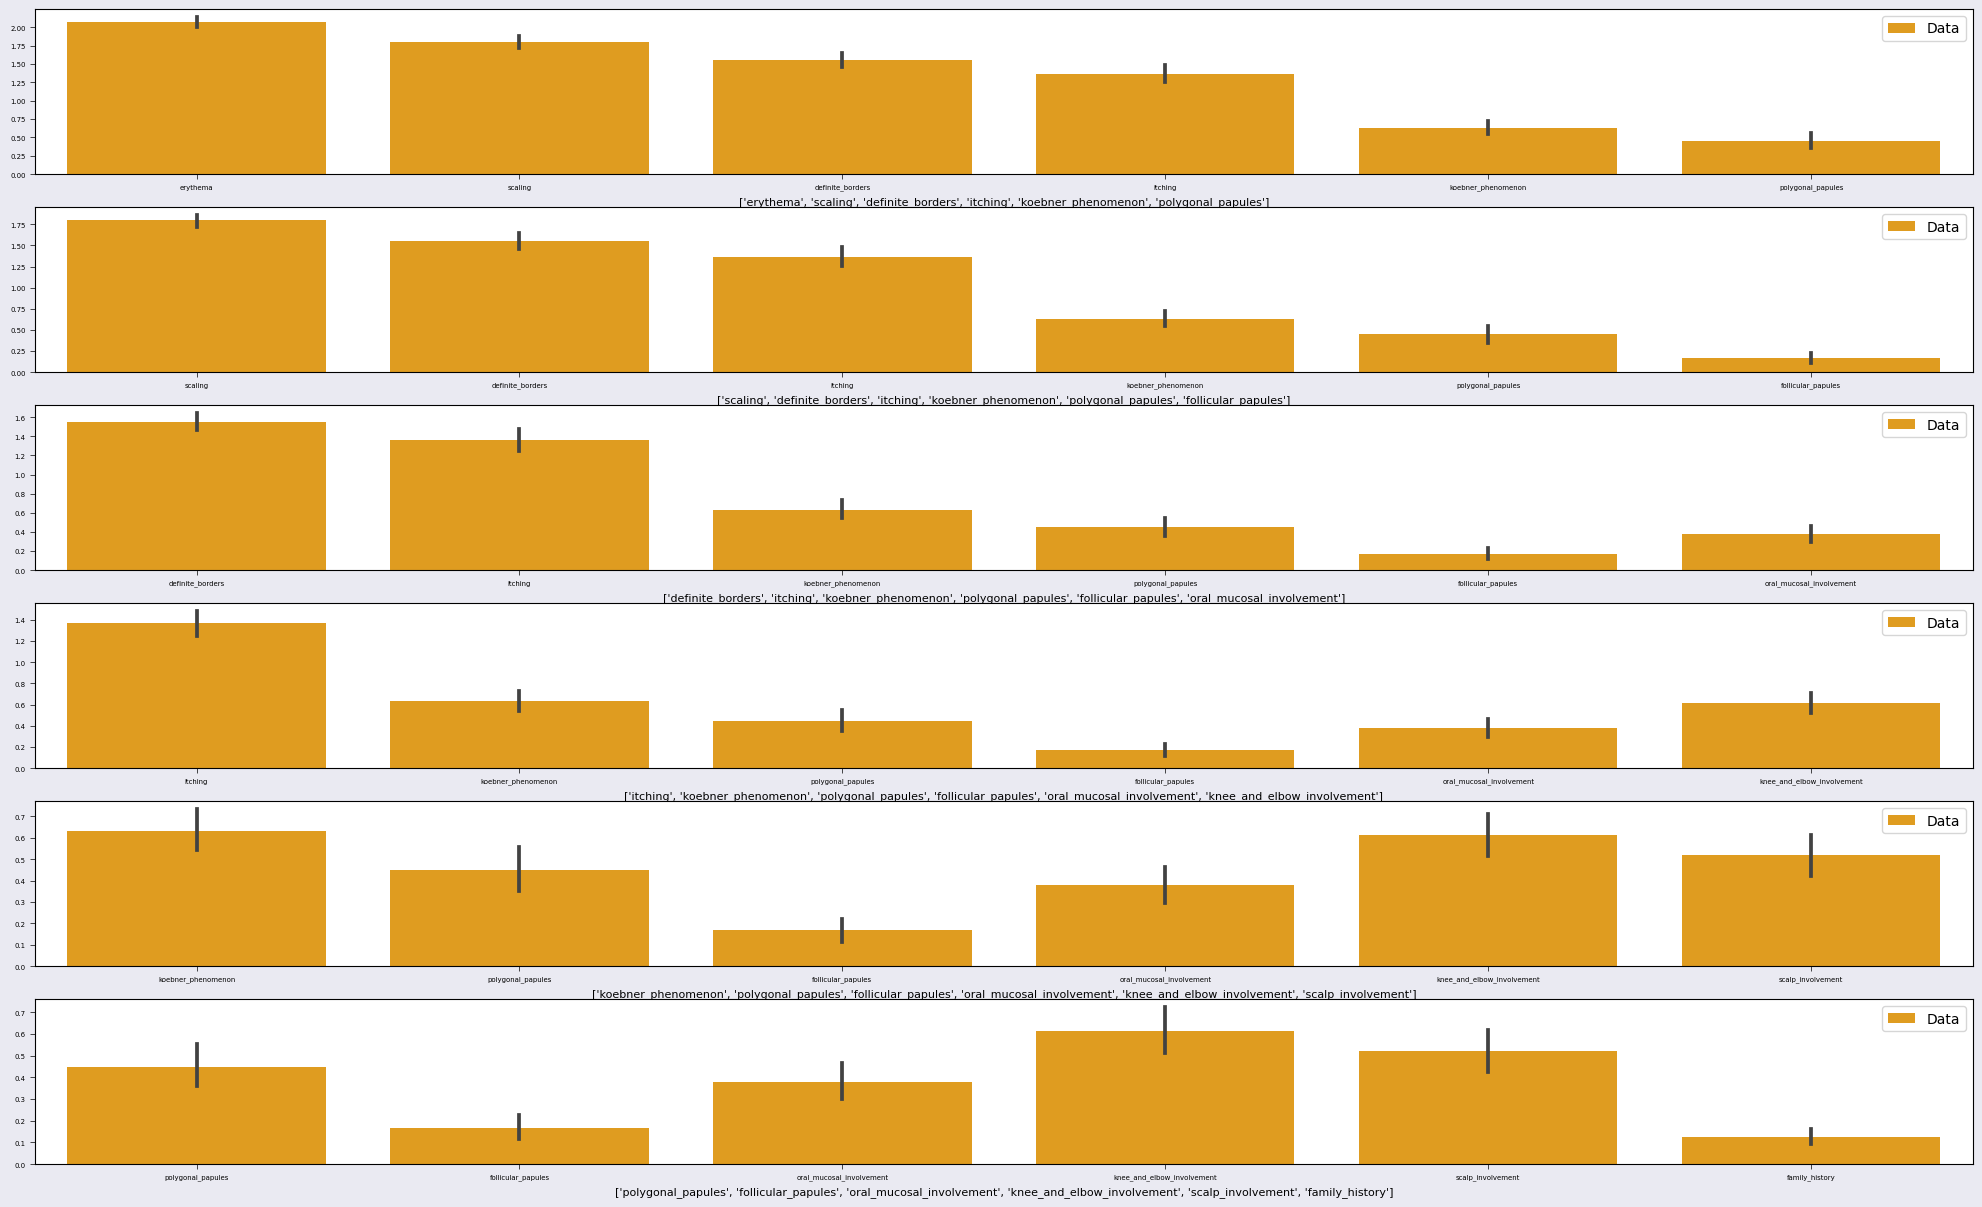

In [8]:
nrows = 6

fig, axes = plt.subplots(nrows, figsize=(25, 15), facecolor='#EAEAF2')

for r in range(nrows):
    col = features[r:r+6]
    print(col)
    df_col = df[col]
    sns.barplot(df_col, ax=axes[r], color='orange', label='Data' , fill =True)
    #sns.histplot(x=test[col], ax=axes[r, c], color='#993404', label='Test data', fill =True, kde = True)
    axes[r].legend()
    axes[r].set_ylabel('')
    axes[r].set_xlabel(col, fontsize=8)
    axes[r].tick_params(labelsize=5, width=0.5)
    axes[r].xaxis.offsetText.set_fontsize(4)
    axes[r].yaxis.offsetText.set_fontsize(4)
plt.show()

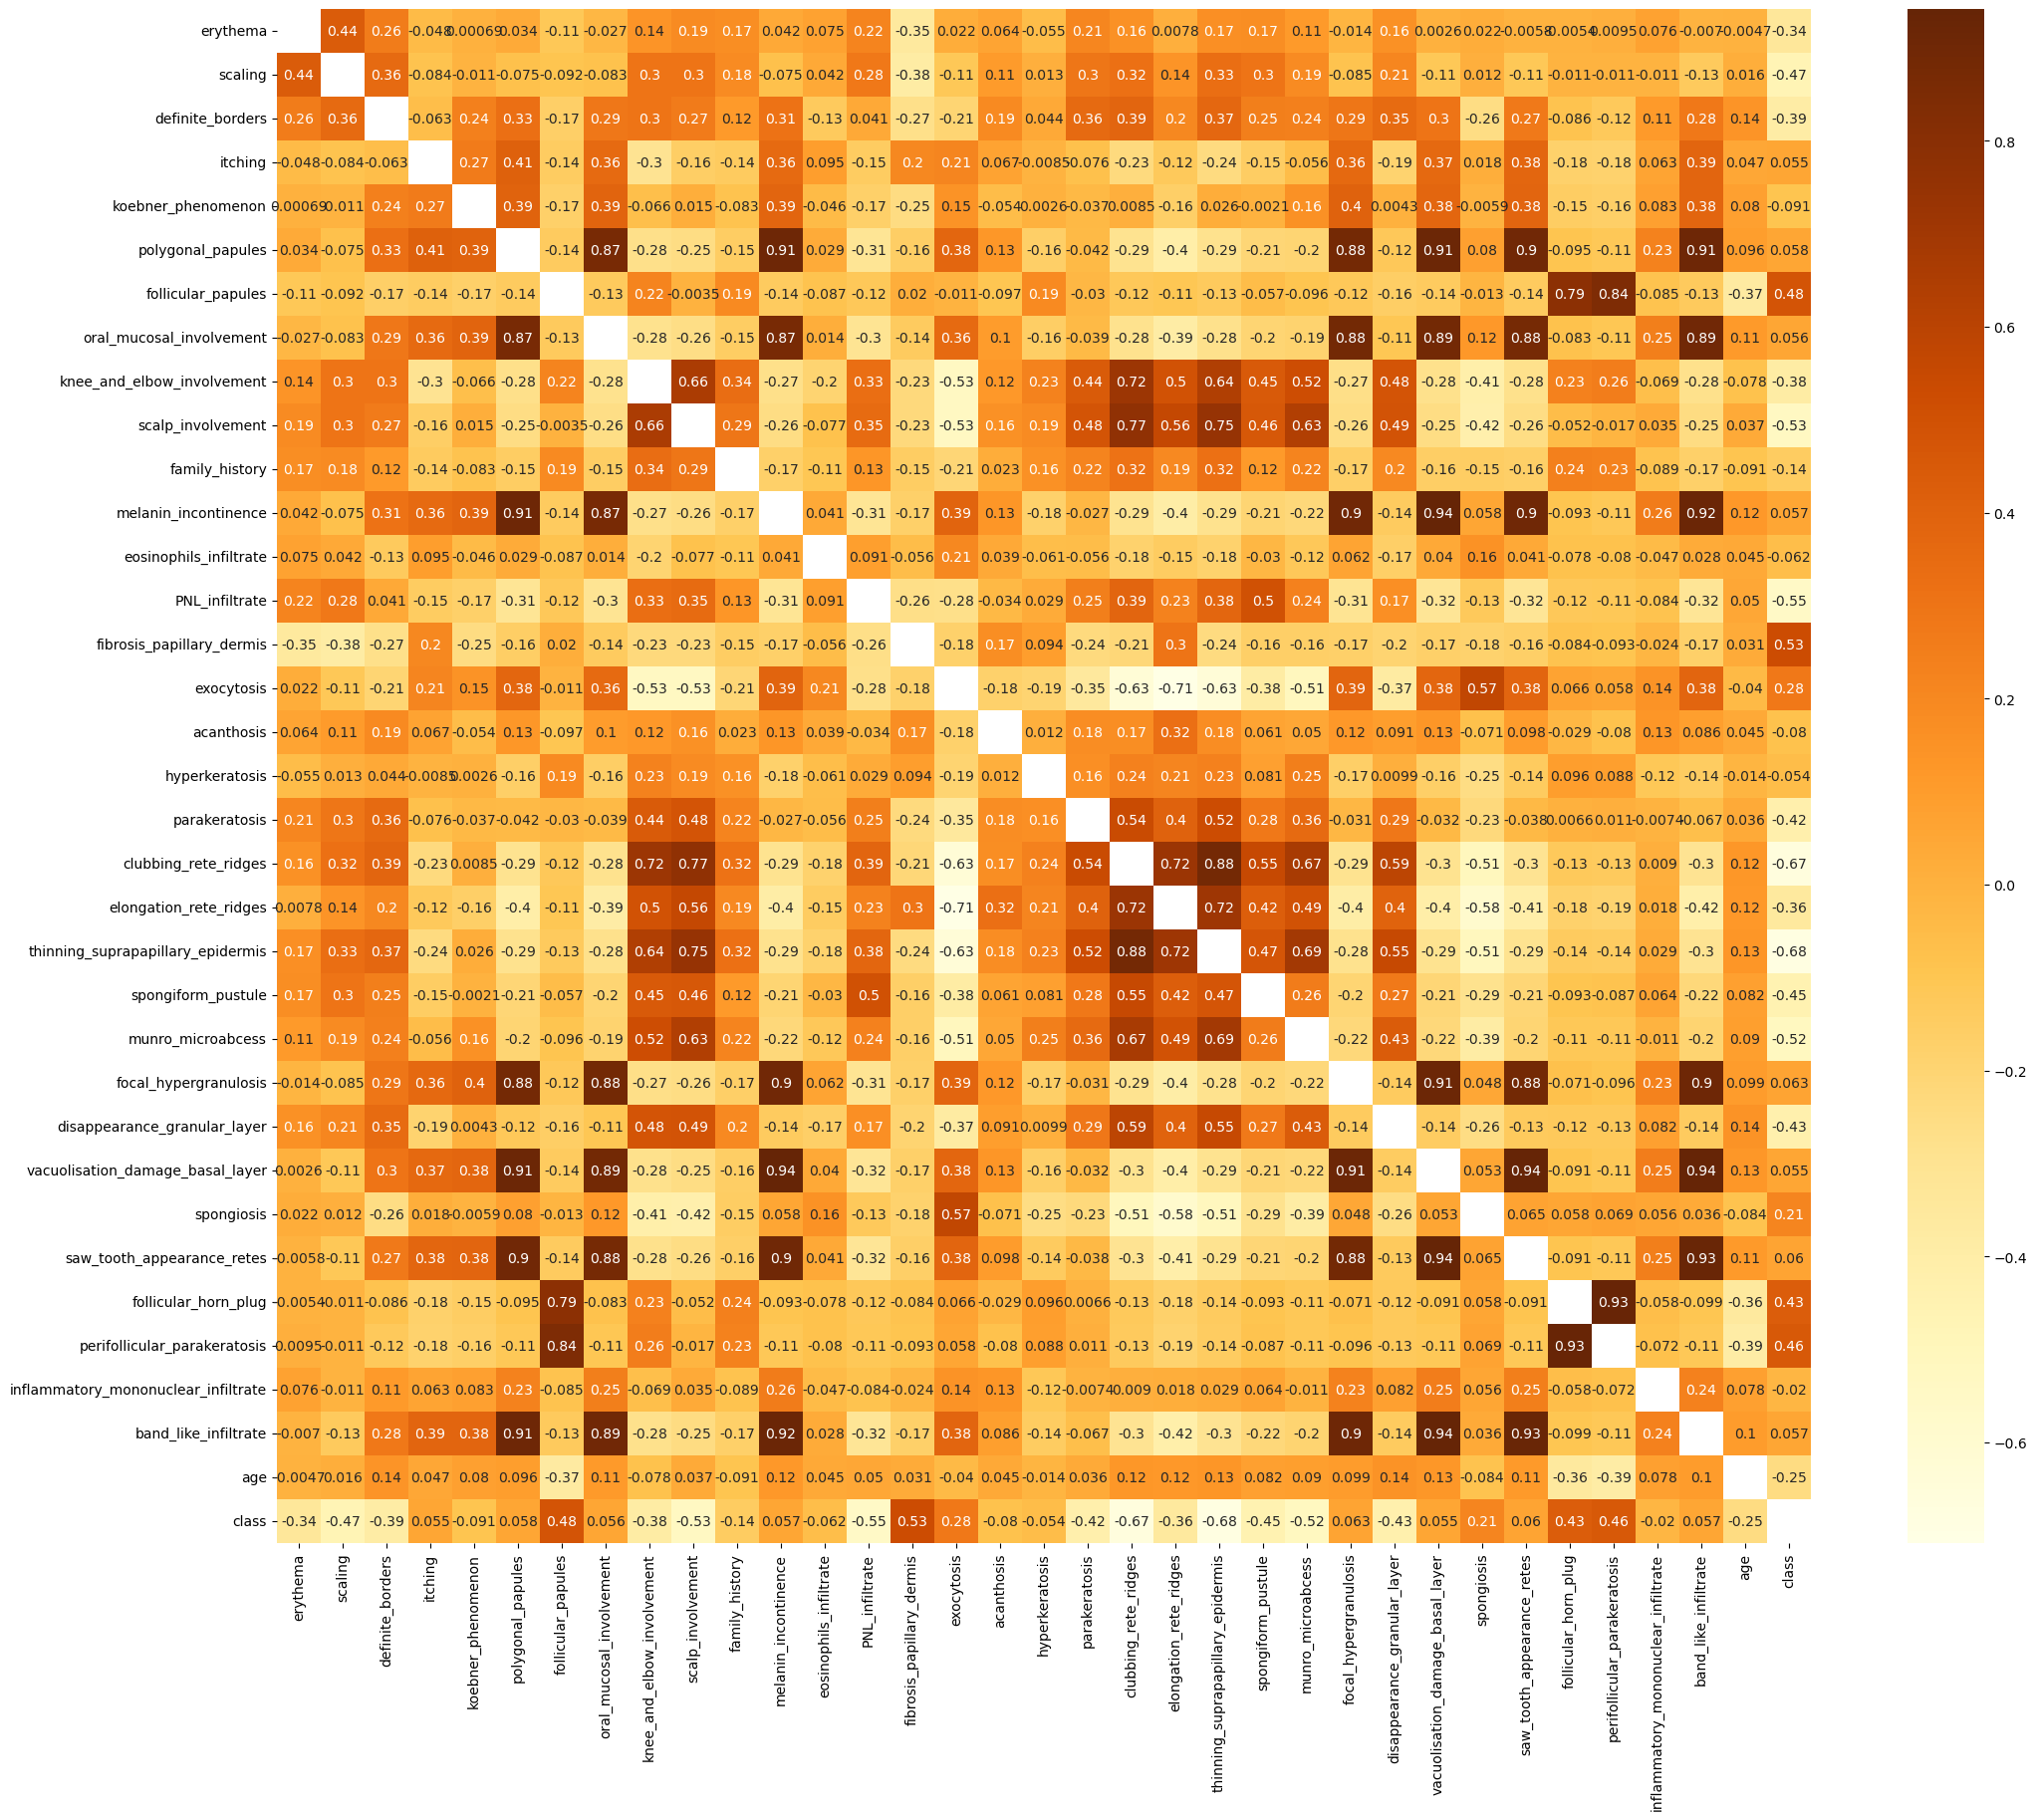

In [9]:
corr_matrix = df.corr()
plt.figure(figsize=(25,20))
np.fill_diagonal(corr_matrix.values, np.nan)
sns.heatmap(df.corr(), cmap="YlOrBr", annot=True, mask=corr_matrix.isnull(), square=True)
plt.show()

In [10]:
y = df['class']
x = df.drop(['class'], axis=1)
train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.75, test_size=0.25, random_state=100)

In [35]:
svc = SVC(kernel="linear", C=0.01)
svc.fit(train_x, train_y)
y_lin = svc.predict(test_x)


accuracy = accuracy_score(test_y, y_lin)
recall = recall_score(test_y, y_lin, average='macro')
precision = precision_score(test_y, y_lin, average='weighted')
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)

Accuracy: 0.8804347826086957
Recall: 0.9067460317460317
Precision: 0.9257033248081841


In [37]:
svr_poly = SVC(kernel="poly", C=10, degree=3)
svr_poly.fit(train_x, train_y)
y_poly = svr_poly.predict(test_x)

accuracy = accuracy_score(test_y, y_poly)
recall = recall_score(test_y, y_poly, average='macro')
precision = precision_score(test_y, y_poly, average='weighted')
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)

Accuracy: 0.8152173913043478
Recall: 0.8410714285714285
Precision: 0.9157349896480332


In [39]:
svr_rbf = SVC(kernel="rbf", C=3)
svr_rbf.fit(train_x, train_y)
y_rbf = svr_rbf.predict(test_x)

accuracy = accuracy_score(test_y, y_rbf)
recall = recall_score(test_y, y_rbf, average='macro')
precision = precision_score(test_y, y_rbf, average='weighted')
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)

Accuracy: 0.782608695652174
Recall: 0.8442460317460317
Precision: 0.9207775919732442


In [41]:
a = []
for i in range(1, 90):
    tree_reg = DecisionTreeClassifier(max_depth=i)
    tree_reg.fit(train_x, train_y)
    
    y_dtr = tree_reg.predict(test_x)

    accuracy = accuracy_score(test_y, y_dtr)
    recall = recall_score(test_y, y_dtr, average='macro')
    precision = precision_score(test_y, y_dtr, average='weighted')
    print("Accuracy:", accuracy)
    print("Recall:", recall)
    print("Precision:", precision)

C:\Users\allle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\allle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\allle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\allle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedM

Accuracy: 0.40217391304347827
Recall: 0.3194444444444444
Precision: 0.28497164461247637
Accuracy: 0.4891304347826087
Recall: 0.4861111111111111
Precision: 0.4367954911433172
Accuracy: 0.6304347826086957
Recall: 0.6416666666666667
Precision: 0.5821361058601134
Accuracy: 0.8913043478260869
Recall: 0.8125
Precision: 0.8403985507246376
Accuracy: 0.9565217391304348
Recall: 0.9553571428571428
Precision: 0.9597547380156075
Accuracy: 0.9347826086956522
Recall: 0.9107142857142857
Precision: 0.9392338390448032
Accuracy: 0.9456521739130435
Recall: 0.9315476190476191
Precision: 0.9500000000000001
Accuracy: 0.9456521739130435
Recall: 0.9484126984126985
Precision: 0.9535573122529644
Accuracy: 0.9347826086956522
Recall: 0.9414682539682538
Precision: 0.9478146302342899
Accuracy: 0.9565217391304348
Recall: 0.9553571428571428
Precision: 0.9571761089152394
Accuracy: 0.9130434782608695
Recall: 0.9136904761904762
Precision: 0.9280538302277432
Accuracy: 0.9239130434782609
Recall: 0.9176587301587301
Precisio

In [43]:
rfr = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=32, n_jobs=-1)
rfr.fit(train_x, train_y)
y_rfr = rfr.predict(test_x)
imp = rfr.feature_importances_

accuracy = accuracy_score(test_y, y_rfr)
recall = recall_score(test_y, y_rfr, average='macro')
precision = precision_score(test_y, y_rfr, average='weighted')
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print(imp)

Accuracy: 0.9347826086956522
Recall: 0.9414682539682538
Precision: 0.9509476031215162
[0.00771569 0.0156526  0.01168076 0.03228622 0.04823365 0.03155796
 0.01548866 0.03721858 0.02149987 0.02788437 0.00277234 0.02737207
 0.00690657 0.0354958  0.07480414 0.0322012  0.00914325 0.00689521
 0.01112426 0.07845045 0.06988166 0.09947424 0.00667928 0.01489081
 0.03497121 0.01832439 0.03930214 0.0438372  0.03462708 0.01479124
 0.01912376 0.00881012 0.03899044 0.02191278]


In [45]:
rfr = GradientBoostingClassifier(random_state=0, learning_rate=0.01, n_estimators=1000, max_depth=10)
rfr.fit(train_x, train_y)
y_gbc = rfr.predict(test_x)

accuracy = accuracy_score(test_y, y_gbc)
recall = recall_score(test_y, y_gbc, average='macro')
precision = precision_score(test_y, y_gbc, average='weighted')
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)

Accuracy: 0.8913043478260869
Recall: 0.9027777777777777
Precision: 0.9121084618980831
